In [1]:
import pandas as ps
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
y_train.shape

(50000, 1)

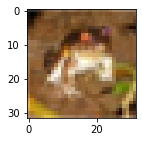

In [6]:
plt.figure(figsize = (15,2))
plt.imshow(x_train[0])

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [9]:
#y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse","ship", "truck"]

In [15]:
def image_index(x_train, y_train, index):
    plt.figure(figsize = (15,2))
    plt.imshow(x_train[index])
    plt.xlabel(classes[y_train[index]])

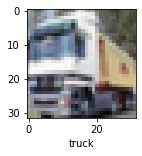

In [16]:
image_index(x_train, y_train, 1)

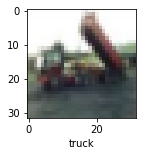

In [17]:
image_index(x_train, y_train, 2)

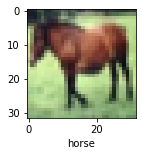

In [19]:
image_index(x_train, y_train, 7
           )

In [20]:
y_test = y_test.reshape(-1,)

In [21]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [22]:
#Normalize the image to a number from 0 to 1, image has 3 channels(R,G,B) and each value in a channel can range between 0 to 255
#hence, normalize in 0-->1 range , we need to divide it by 255
x_train = x_train/255
x_test = x_test/255

In [23]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
#Firstly, training using ANN
ANN = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [27]:
ANN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy')

In [28]:
ANN.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 146s 94ms/step - loss: 1.8769 - accuracy: 0.3285
Epoch 2/10
1563/1563 [==============================] - 154s 99ms/step - loss: 1.6658 - accuracy: 0.3995
Epoch 3/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.5850 - accuracy: 0.4328
Epoch 4/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.5324 - accuracy: 0.4478
Epoch 5/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4924 - accuracy: 0.4636
Epoch 6/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4622 - accuracy: 0.4786
Epoch 7/10
1563/1563 [==============================] - 144s 92ms/step - loss: 1.4364 - accuracy: 0.4851
Epoch 8/10
1563/1563 [==============================] - 145s 93ms/step - loss: 1.4073 - accuracy: 0.4947
Epoch 9/10
1563/1563 [==============================] - 139s 89ms/step - loss: 1.3865 - accuracy: 0.5038
Epoch 10/10
1563/1563 [==============================] 

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = ANN.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.59      0.47      0.52      1000
           1       0.63      0.53      0.58      1000
           2       0.37      0.34      0.35      1000
           3       0.37      0.18      0.24      1000
           4       0.46      0.32      0.38      1000
           5       0.34      0.51      0.41      1000
           6       0.53      0.52      0.52      1000
           7       0.43      0.68      0.53      1000
           8       0.52      0.71      0.60      1000
           9       0.59      0.52      0.55      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



In [39]:
#Building a convolutional neural network
CNN = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
        
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [40]:
CNN.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])

In [41]:
CNN.fit(x_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.4666 - accuracy: 0.4747
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.0994 - accuracy: 0.6165
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9808 - accuracy: 0.6601
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9031 - accuracy: 0.6854
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8421 - accuracy: 0.7099
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.7910 - accuracy: 0.7253
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.7430 - accuracy: 0.7434
Epoch 8/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7007 - accuracy: 0.7558
Epoch 9/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6627 - accuracy: 0.7692
Epoch 10/10
1563/1563 [==============================] - 39s 25m

# with CNN, at then end of 5 epochs, accuracy is around 70%

In [42]:
CNN.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.8942 - accuracy: 0.7044


[0.8942056894302368, 0.7044000029563904]

In [43]:
y_pred = CNN.predict(x_test)
y_pred[:5]

array([[1.21465954e-03, 4.93768079e-04, 7.24899396e-03, 2.60426968e-01,
        1.20862201e-03, 7.10077047e-01, 5.09398989e-03, 3.79482808e-04,
        1.37955435e-02, 6.08224072e-05],
       [3.37502384e-03, 4.30073887e-02, 2.53909974e-07, 2.33940711e-09,
        5.32755129e-09, 3.77111675e-10, 1.22918387e-09, 2.31668129e-09,
        9.51490462e-01, 2.12683645e-03],
       [2.86124796e-02, 2.17001393e-01, 1.18752196e-03, 1.45212270e-03,
        6.40810700e-04, 6.41051214e-04, 6.22988882e-05, 2.55763275e-03,
        7.26943374e-01, 2.09012944e-02],
       [9.92749810e-01, 8.53412494e-05, 1.18434371e-03, 7.36231450e-04,
        1.67148141e-03, 1.38729210e-05, 8.23076061e-06, 1.01908336e-04,
        3.40888882e-03, 3.98203629e-05],
       [5.24046663e-06, 2.15323544e-05, 5.06543647e-03, 1.48933873e-01,
        1.64746627e-01, 2.24568998e-03, 6.78921103e-01, 6.04426486e-06,
        4.01543693e-05, 1.43482366e-05]], dtype=float32)

In [45]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[5, 8, 8, 0, 6]

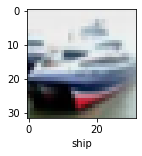

In [46]:
image_index(x_test, y_pred_classes, 1)

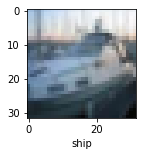

In [47]:
image_index(x_test, y_pred_classes, 2)

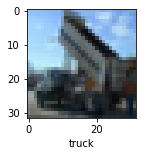

In [48]:
image_index(x_test, y_pred_classes, 50
           )

In [50]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      1000
           1       0.79      0.84      0.81      1000
           2       0.61      0.57      0.59      1000
           3       0.60      0.44      0.51      1000
           4       0.64      0.65      0.65      1000
           5       0.56      0.67      0.61      1000
           6       0.77      0.78      0.78      1000
           7       0.72      0.76      0.74      1000
           8       0.85      0.78      0.81      1000
           9       0.73      0.81      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

